In [11]:
import numpy as np
import pandas as pd
import joblib

RANDOM_SEED = 42

### Specify Paths

In [12]:
data_path = './data/data.csv'
model_path = './model'
log_file = 'logmod.pkl'

### Load training Data

In [13]:
df = pd.read_csv(data_path, low_memory=False)
df

,label,T-31_P0x,T-31_P0y,T-31_P0z,T-31_P1x,T-31_P1y,T-31_P1z,T-31_P2x,T-31_P2y,T-31_P2z,...,T-0_P17z,T-0_P18x,T-0_P18y,T-0_P18z,T-0_P19x,T-0_P19y,T-0_P19z,T-0_P20x,T-0_P20y,T-0_P20z
0,1.0,0.515261,0.522433,1.175448e-07,0.497493,0.484558,-0.006219,0.488386,0.438089,-0.009695,...,-0.017502,0.527051,0.373574,-0.025206,0.522634,0.351043,-0.028462,0.517234,0.331246,-0.030454
1,1.0,0.512071,0.525142,7.155288e-08,0.486010,0.507603,-0.008274,0.466830,0.471264,-0.012303,...,-0.017896,0.582152,0.401804,-0.024307,0.592346,0.382315,-0.026803,0.601037,0.365683,-0.028385
2,1.0,0.526035,0.538470,-6.282853e-08,0.500776,0.505372,-0.007828,0.484524,0.462951,-0.013429,...,-0.015140,0.573421,0.401325,-0.021049,0.582498,0.381868,-0.023110,0.590693,0.364288,-0.024354
3,1.0,0.518246,0.528164,5.977805e-08,0.498436,0.497890,-0.008777,0.484721,0.454298,-0.014273,...,-0.018264,0.557811,0.365809,-0.023875,0.565904,0.344100,-0.025050,0.572534,0.326821,-0.025625
4,1.0,0.509820,0.499052,9.852938e-08,0.489351,0.465295,-0.007495,0.477290,0.419927,-0.011518,...,-0.015224,0.601553,0.383937,-0.020833,0.613516,0.369314,-0.022855,0.624135,0.355479,-0.024308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2297,0.0,0.492221,0.427074,1.121376e-07,0.475410,0.429565,-0.004673,0.462784,0.451189,-0.008730,...,-0.008705,0.479379,0.488358,-0.010794,0.473834,0.499231,-0.011171,0.469231,0.507583,-0.011365
2298,0.0,0.483212,0.433865,1.087352e-07,0.470250,0.432363,-0.006265,0.459397,0.448824,-0.009515,...,-0.013245,0.484305,0.486075,-0.016989,0.479765,0.503165,-0.018609,0.475244,0.515706,-0.019364
2299,0.0,0.473613,0.422390,1.795117e-07,0.458205,0.427830,-0.008309,0.449110,0.450523,-0.013192,...,-0.015775,0.455428,0.478055,-0.018600,0.449611,0.493365,-0.019049,0.444980,0.503313,-0.018868
2300,0.0,0.462505,0.399768,8.616083e-08,0.445437,0.406100,-0.003580,0.434906,0.428723,-0.007358,...,-0.018578,0.447403,0.475734,-0.021828,0.441982,0.489413,-0.022132,0.437367,0.498718,-0.022092


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:],
                                                    df['label'],
                                                    random_state=42,
                                                    test_size=0.2,
                                                    shuffle=True)
X_train, X_test, y_train, y_test = X_train.values, X_test.values, y_train.values, y_test.values

In [15]:
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt

sns.set(rc={"figure.figsize":(6, 5)})

def print_stats(y_pred):
    print(f'accuracy:\t {metrics.accuracy_score(y_test, y_pred)}')
    print(f'precision:\t {metrics.precision_score(y_test, y_pred, average="macro")}')
    print(f'recall:\t\t {metrics.recall_score(y_test, y_pred, average="macro")}')
    print(f'f-score:\t {metrics.f1_score(y_test, y_pred, average="macro")}')
    cf_matrix = metrics.confusion_matrix(y_test, y_pred)
    cf_matrix_n = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cf_matrix, cmap='Greens', annot=True)
    plt.ylabel('Actual', size=14)
    plt.xlabel('Predicted', size=14)
    plt.title('confusion matrix', size=18)
    plt.show(block=False)
    sns.heatmap(cf_matrix_n, cmap='Blues', annot=True)
    plt.ylabel('Actual', size=14)
    plt.xlabel('Predicted', size=14)
    plt.title('confusion matrix percentages', size=18)
    plt.show(block=False)

### Logistic Regression Baseline

In [16]:
from sklearn.linear_model import LogisticRegression

log_base = LogisticRegression(max_iter=1000)
log_base.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

accuracy:	 0.9631236442516269
precision:	 0.9657942275063076
recall:		 0.9471724137931034
f-score:	 0.9538604513765805


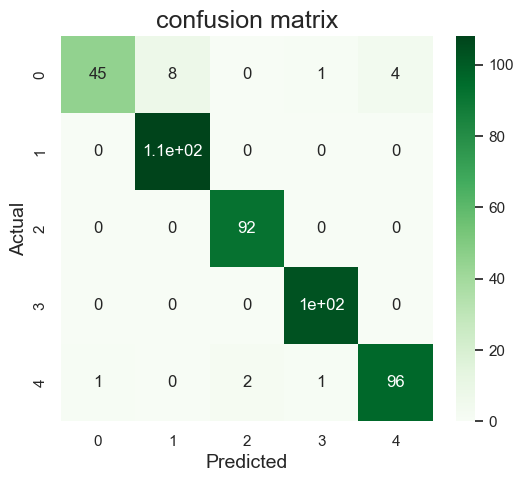

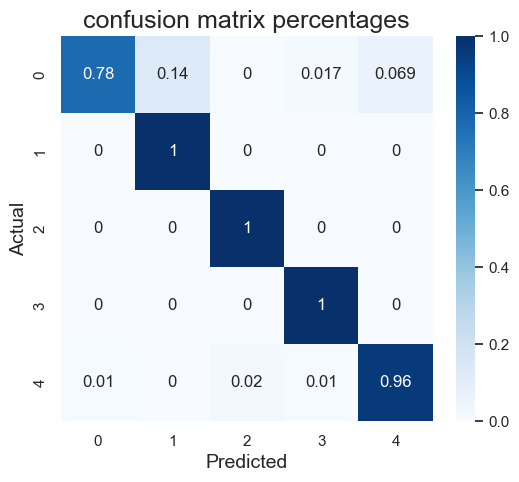

In [17]:
print_stats(log_base.predict(X_test))

### SVM

In [18]:
from sklearn.svm import SVC

svm = SVC(max_iter=1000, probability=True)
svm.fit(X_train, y_train)

SVC(max_iter=1000, probability=True)

accuracy:	 0.8373101952277657
precision:	 0.8694543644985657
recall:		 0.7929380649481084
f-score:	 0.796368365335527


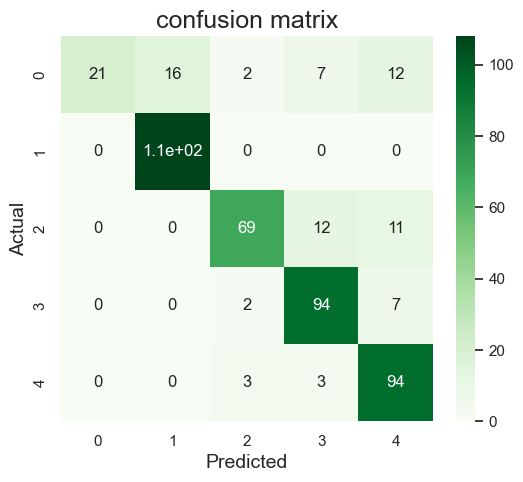

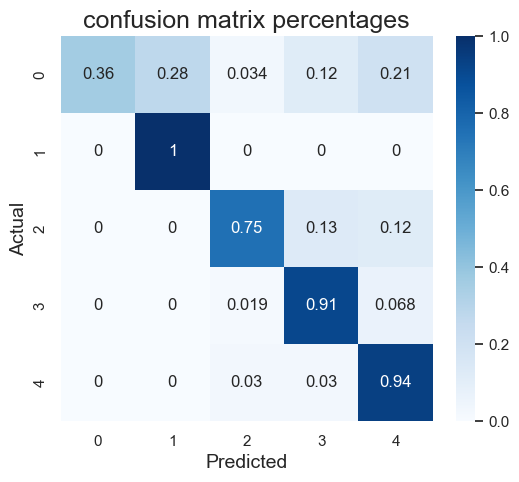

In [19]:
print_stats(svm.predict(X_test))

### Neural Network

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

nn = Sequential()
nn.add(layers.Dense(X_train.shape[1], activation='relu', input_shape=(X_train.shape[1],)))
# nn.add(layers.Dropout(0.2))
# nn.add(layers.Dense(128, activation='relu'))
nn.add(layers.Dropout(0.2))
nn.add(layers.Dense(64, activation='relu'))
nn.add(layers.Dropout(0.2))
nn.add(layers.Dense(32, activation='relu'))
nn.add(layers.Dense(5, activation='softmax'))


In [21]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy

nn.compile(optimizer='adam',
              loss= SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [22]:
nn.fit(X_train, y_train, epochs=100)

Epoch 1/100
58/58 [==============================] - 1s 14ms/step - loss: 1.6412 - accuracy: 0.2520
Epoch 2/100
58/58 [==============================] - 1s 13ms/step - loss: 1.5813 - accuracy: 0.2846
Epoch 3/100
58/58 [==============================] - 1s 13ms/step - loss: 1.5101 - accuracy: 0.3210
Epoch 4/100
58/58 [==============================] - 1s 13ms/step - loss: 1.2951 - accuracy: 0.4367
Epoch 5/100
58/58 [==============================] - 1s 13ms/step - loss: 1.1403 - accuracy: 0.4965
Epoch 6/100
58/58 [==============================] - 1s 14ms/step - loss: 1.0432 - accuracy: 0.5263
Epoch 7/100
58/58 [==============================] - 1s 14ms/step - loss: 0.9584 - accuracy: 0.5741
Epoch 8/100
58/58 [==============================] - 1s 13ms/step - loss: 0.9348 - accuracy: 0.5823
Epoch 9/100
58/58 [==============================] - 1s 14ms/step - loss: 0.9484 - accuracy: 0.5807
Epoch 10/100
58/58 [==============================] - 1s 14ms/step - loss: 0.8827 - accuracy: 0.6111

15/15 [==============================] - 0s 4ms/step
accuracy:	 0.9501084598698482
precision:	 0.9411972147349505
recall:		 0.9401292837939174
f-score:	 0.9401910271312591


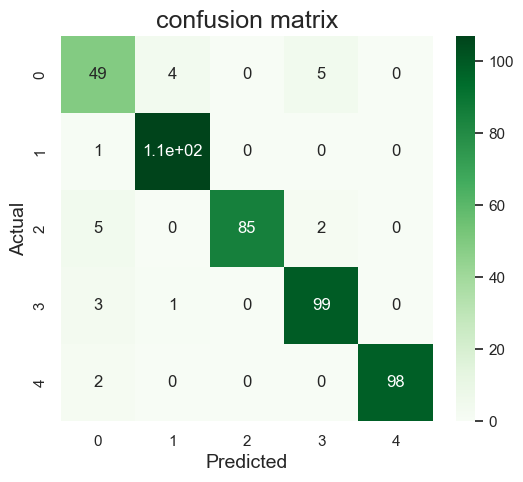

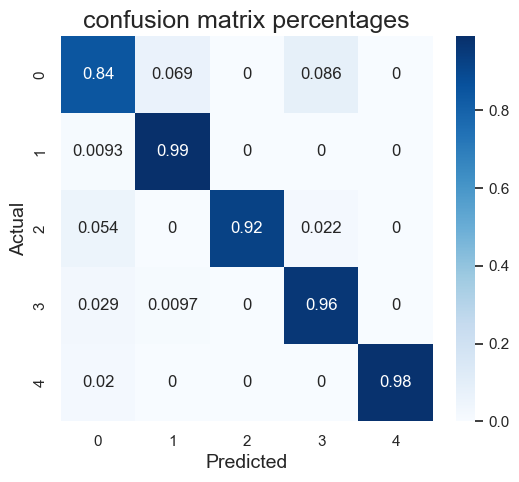

In [23]:
print_stats(np.argmax(nn.predict(X_test), axis=1))

In [24]:
sample = np.array(df.iloc[5,1:]).reshape(1,-1)
sample

array([[ 5.31582892e-01,  4.62265372e-01,  1.39195947e-07, ...,
         5.44090748e-01,  3.03124011e-01, -2.26613469e-02]])

In [25]:
%%timeit
svm.predict_proba(sample)

2.39 ms ± 20.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [26]:
%%timeit
log_base.predict_proba(sample)

119 µs ± 245 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [27]:
%%timeit
nn.predict(sample)

1/1 [==============================] - 0s 25ms/step
57.8 ms ± 269 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [28]:
# save
joblib.dump(log_base, model_path + '/' + log_file) 


['./model/logmod.pkl']

In [29]:
from tensorflow import keras

# save
model_file = 'model.keras'
nn.save(model_path + model_file)

# load
# knn_model = keras.models.load_model(model_file)
# knn_model.summary()